In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

C:\Users\Zeynep\AppData\Local\Temp\ipykernel_16348\686016230.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df= pd.read_csv("amz_us_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,category,isBestSeller,boughtInLastMonth
0,1,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",4.5,0,139.99,Suitcases,False,2000
1,2,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,4.5,0,169.99,Suitcases,False,1000
2,3,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,4.6,0,365.49,Suitcases,False,300
3,4,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,4.6,0,291.59,Suitcases,False,400
4,5,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,4.5,0,174.99,Suitcases,False,400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735414 entries, 0 to 1735413
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   category           object 
 7   isBestSeller       bool   
 8   boughtInLastMonth  int64  
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 107.6+ MB


In [5]:
df.isnull().sum()

uid                  0
asin                 0
title                1
stars                0
reviews              0
price                0
category             0
isBestSeller         0
boughtInLastMonth    0
dtype: int64

In [6]:
df.head(1)

,uid,asin,title,stars,reviews,price,category,isBestSeller,boughtInLastMonth
0,1,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",4.5,0,139.99,Suitcases,False,2000


In [7]:
df["stars"].mean()

4.054888747007915

In [8]:
df["reviews"].mean()

177.28093872701268

In [9]:
df["price"].mean()

42.2025347381086

In [10]:
df["asin"].unique()

array(['B014TMV5YE', 'B07GDLCQXV', 'B07XSCCZYG', ..., 'B07X1MVNT1',
       'B08XLBG8V9', 'B07GH67QC8'], dtype=object)

In [11]:
df["title"].unique()

array(['Sion Softside Expandable Roller Luggage, Black, Checked-Large 29-Inch',
       'Luggage Sets Expandable PC+ABS Durable Suitcase Double Wheels TSA Lock Blue',
       'Platinum Elite Softside Expandable Checked Luggage, 8 Wheel Spinner Suitcase, TSA Lock, Men and Women, True Navy Blue, Checked Medium 25-Inch',
       ..., "Men's Baseball Cap - H2O-DRI Line Up Curved Brim Fitted Hat",
       '[4 Pack] Adjustable Eyeglasses and Sunglasses Holder Strap Cord for Sports, Anti-slippery Eyeglass Retainer with One Free Microfiber Cleaning Cloths(4 Pack)',
       'in Hoc Signo Vinces Knights Templar Masonic Embroidered Black Adjustable Baseball Cap'],
      dtype=object)

In [12]:
df["category"].unique()

array(['Suitcases', "Men's Clothing", 'Consoles & Accessories',
       "Men's Shoes", "Men's Accessories", 'Vacuum Cleaners & Floor Care',
       'Televisions & Video Products', 'Additive Manufacturing Products',
       'Headphones & Earbuds', "Boys' Watches", "Girls' Clothing",
       "Boys' Clothing", 'Pregnancy & Maternity Products',
       'Shaving & Hair Removal Products', 'Fabric Decorating',
       'Industrial Materials', 'Smart Home: Security Cameras and Systems',
       'Office Electronics', 'Sports & Outdoor Play Toys',
       "Kids' Play Tractors", 'Slot Cars, Race Tracks & Accessories',
       'Video Games', 'Smart Home: Voice Assistants and Hubs',
       'Light Bulbs', 'Toys & Games', "Kids' Furniture",
       'Automotive Tires & Wheels', 'Wellness & Relaxation Products',
       'Automotive Tools & Equipment', 'Baby & Toddler Toys',
       "Kids' Play Boats", 'Computer Monitors', "Girls' Jewelry",
       'Luggage', 'Printmaking Supplies', "Women's Handbags",
       'Foot, 

In [13]:
df.head(3)

,uid,asin,title,stars,reviews,price,category,isBestSeller,boughtInLastMonth
0,1,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",4.5,0,139.99,Suitcases,False,2000
1,2,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,4.5,0,169.99,Suitcases,False,1000
2,3,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,4.6,0,365.49,Suitcases,False,300


In [14]:
df.groupby("category")[["price"]].mean().reset_index()

,category,price
0,Abrasive & Finishing Products,24.323234
1,Accessories & Supplies,41.310297
2,Additive Manufacturing Products,53.640182
3,Arts & Crafts Supplies,13.871158
4,Arts Crafts & Sewing Storage,20.648206
...,...,...
231,Women's Handbags,55.820788
232,Women's Jewelry,30.859654
233,Women's Shoes,74.997506
234,Women's Watches,80.685063


In [15]:
category=df.groupby("category")[["price","stars"]].mean().reset_index()
category

,category,price,stars
0,Abrasive & Finishing Products,24.323234,3.501474
1,Accessories & Supplies,41.310297,4.384514
2,Additive Manufacturing Products,53.640182,3.106792
3,Arts & Crafts Supplies,13.871158,4.240087
4,Arts Crafts & Sewing Storage,20.648206,3.156106
...,...,...,...
231,Women's Handbags,55.820788,3.846952
232,Women's Jewelry,30.859654,4.246048
233,Women's Shoes,74.997506,3.920055
234,Women's Watches,80.685063,3.721335


Text(0.5, 1.0, 'price / category')

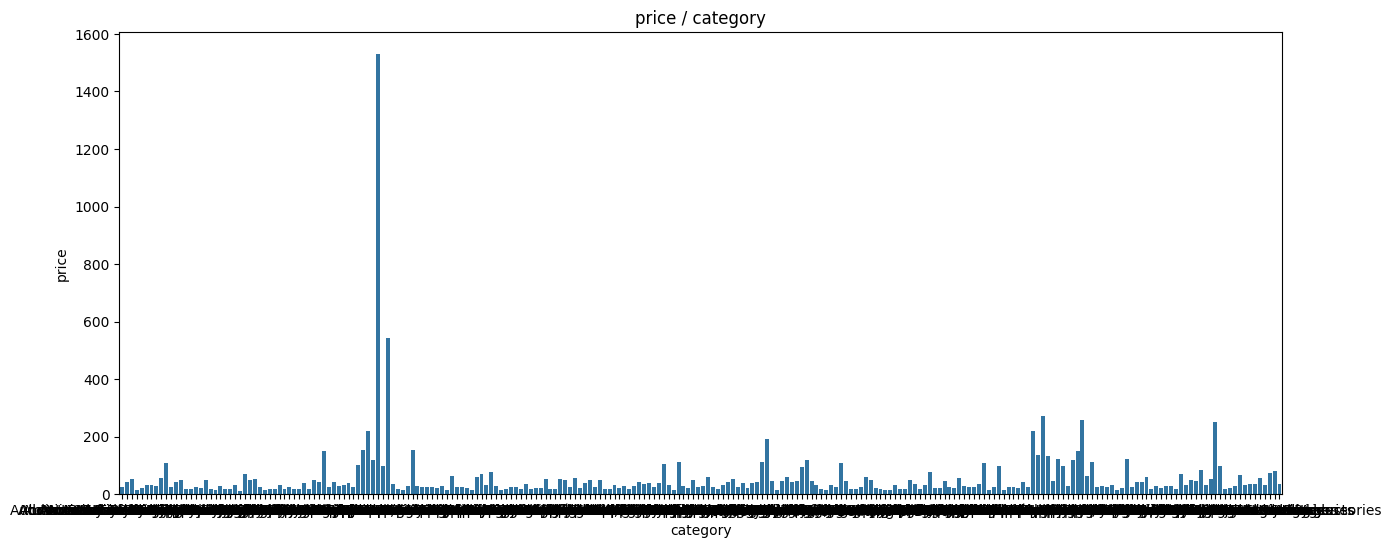

In [16]:
plt.figure(figsize=(15,6))
sns.barplot(x = "category",y="price",data=category)
plt.xlabel("category")
plt.ylabel("price")
plt.title("price / category")

In [17]:
best_seller = df.groupby(["boughtInLastMonth","isBestSeller"])[["price"]].sum().reset_index()
best_seller

,boughtInLastMonth,isBestSeller,price
0,0,False,54910203.47
1,0,True,101662.81
2,50,False,5501787.20
3,50,True,11978.95
4,100,False,4584268.95
5,100,True,25808.27
6,200,False,2161988.82
7,200,True,17856.90
8,300,False,1245331.79
9,300,True,16212.74


In [18]:
df.head(5)

,uid,asin,title,stars,reviews,price,category,isBestSeller,boughtInLastMonth
0,1,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",4.5,0,139.99,Suitcases,False,2000
1,2,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,4.5,0,169.99,Suitcases,False,1000
2,3,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,4.6,0,365.49,Suitcases,False,300
3,4,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,4.6,0,291.59,Suitcases,False,400
4,5,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,4.5,0,174.99,Suitcases,False,400


<Axes: xlabel='price', ylabel='stars'>

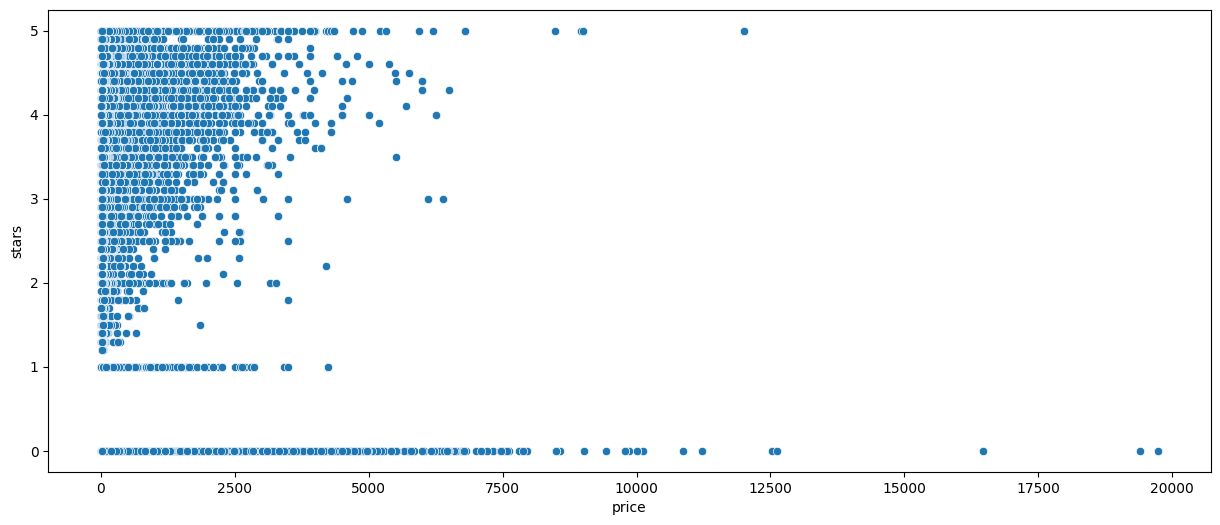

In [19]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = "price", y = "stars", data = df)

Text(0.5, 1.0, 'Units Sold By category')

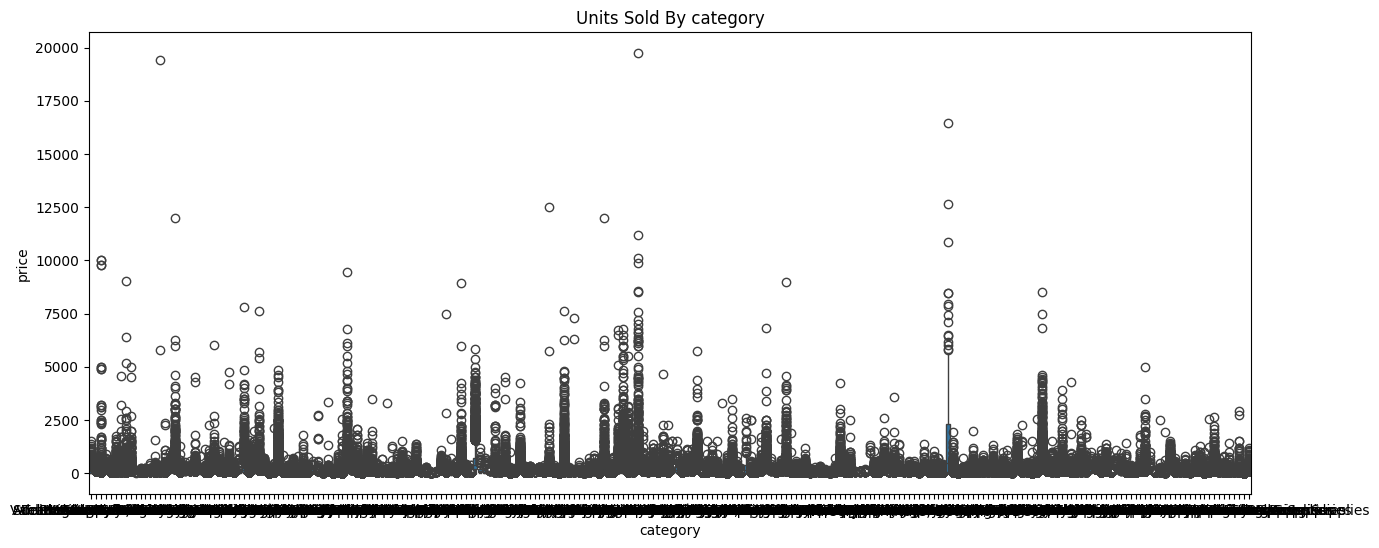

In [20]:
plt.figure(figsize=(15,6))
sns.boxplot(x = "category", y = "price",data=df)
plt.xlabel("category")
plt.ylabel("price")
plt.title("Units Sold By category")